## Analysis (binned performance)

### Updated 2022-07-18

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import itertools

In [10]:
df_trials = pd.read_pickle('./frames/df_trials.pickle')

df_retry_trials = df_trials[df_trials.retry_response > -1]

<ipython-input-76-1fed30c71576>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bin_idx_var] = bin_idxs


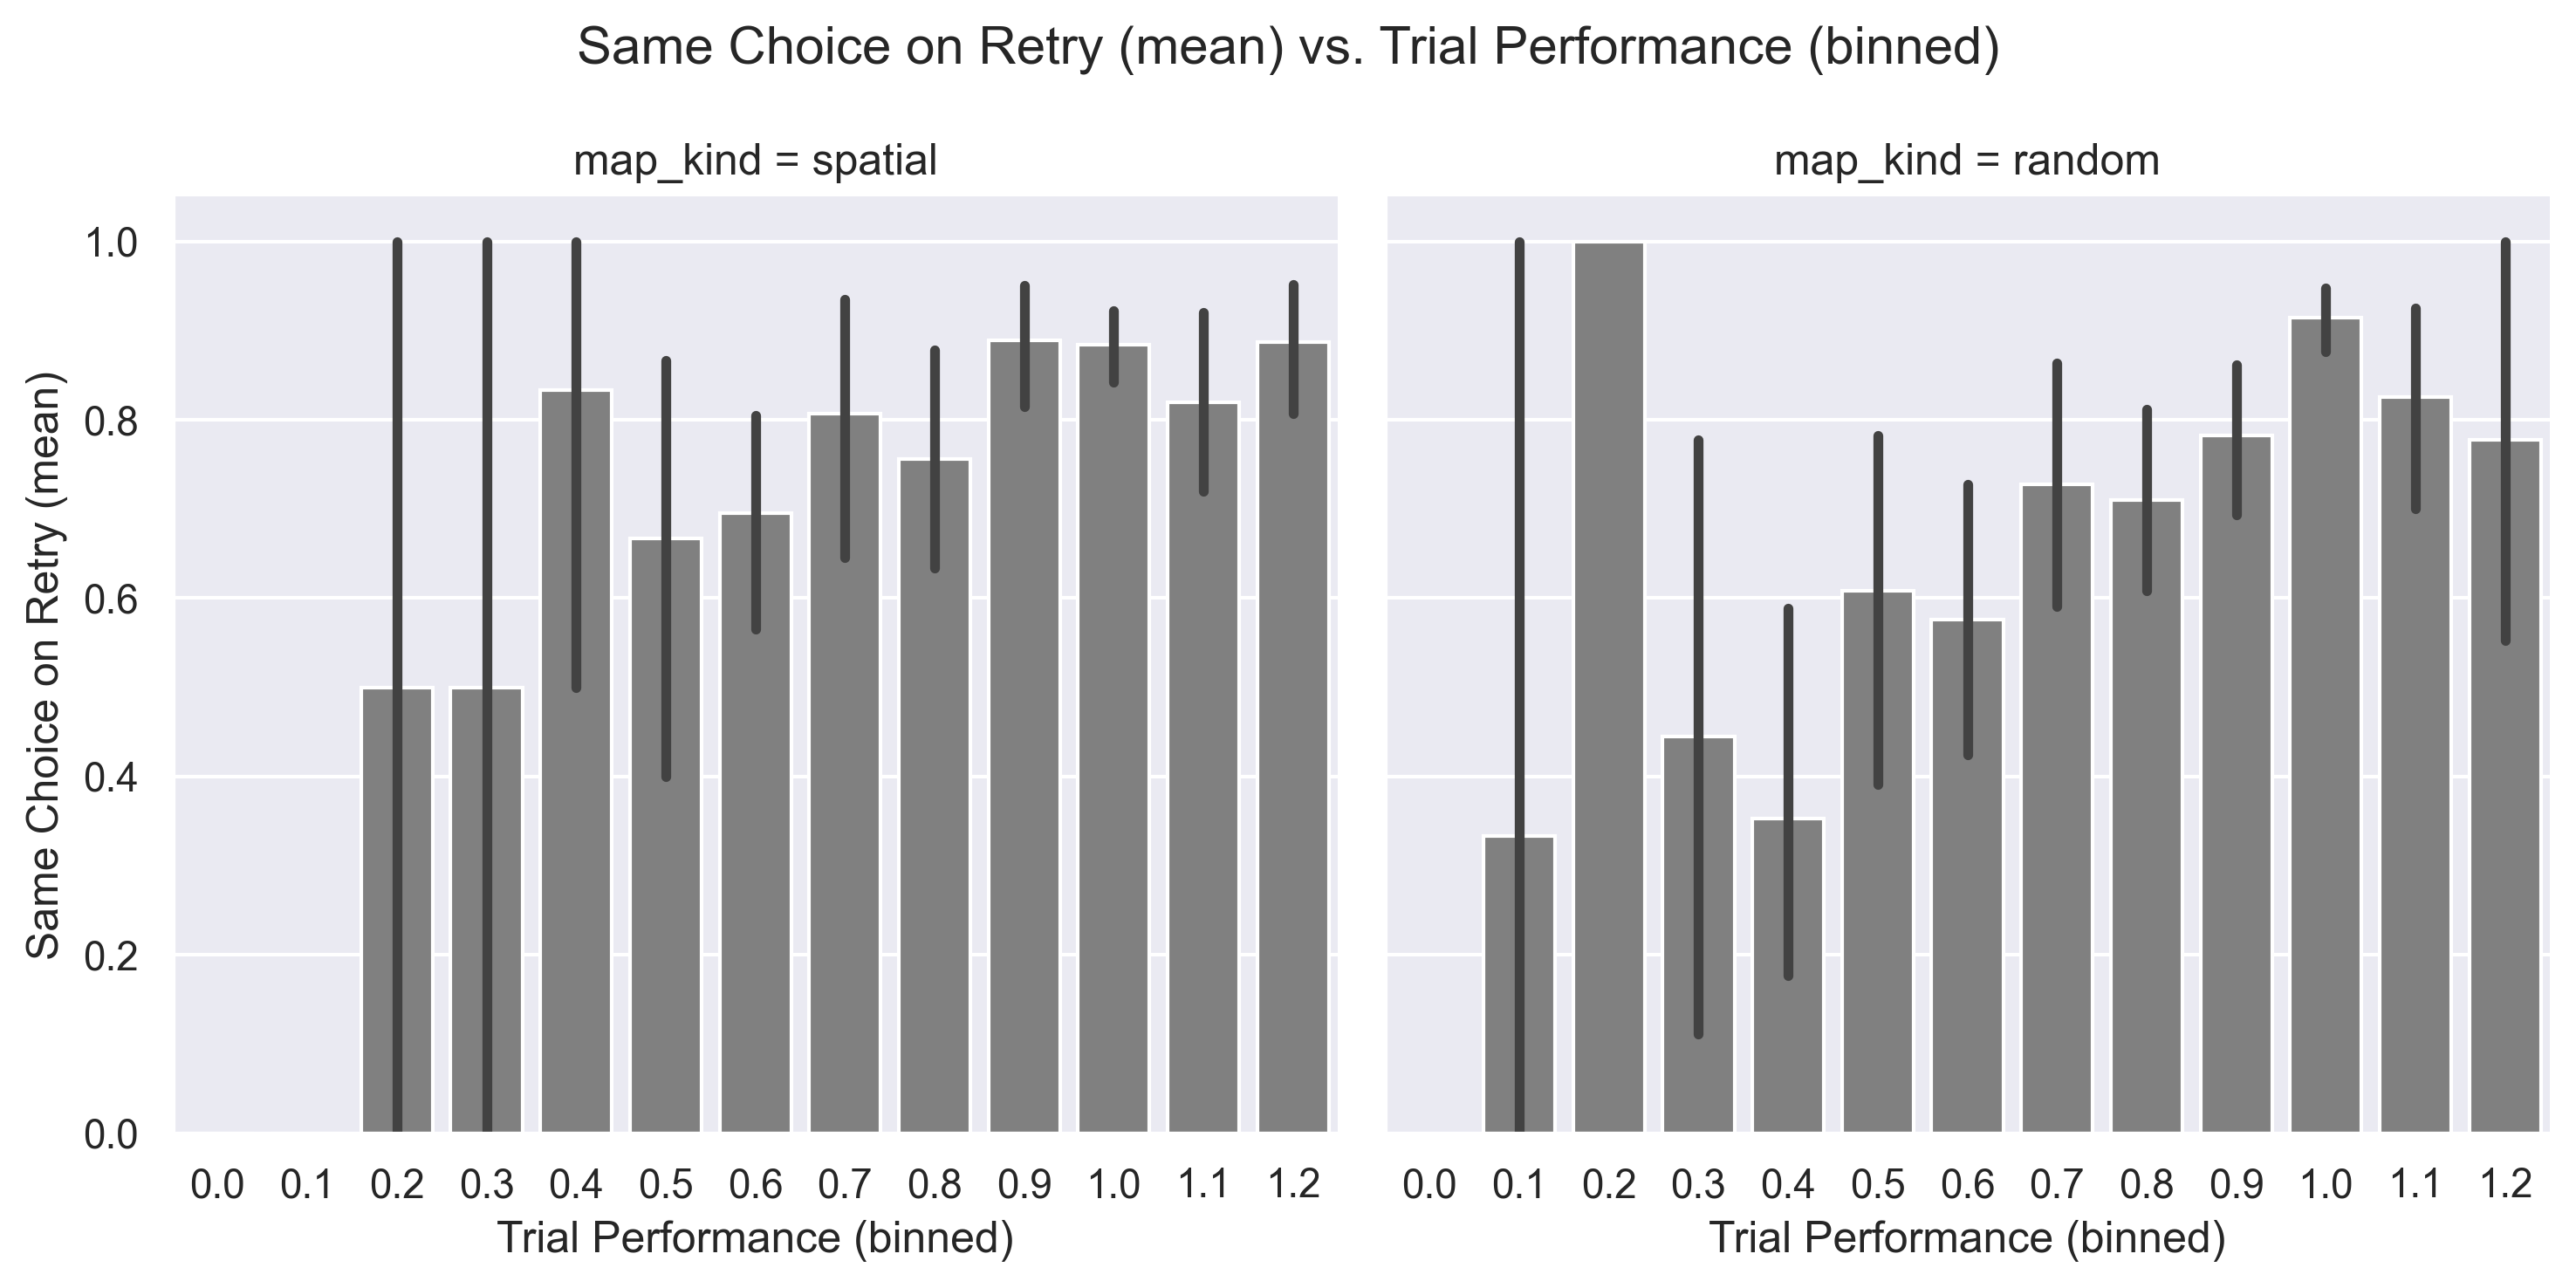

<ipython-input-76-1fed30c71576>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bin_idx_var] = bin_idxs


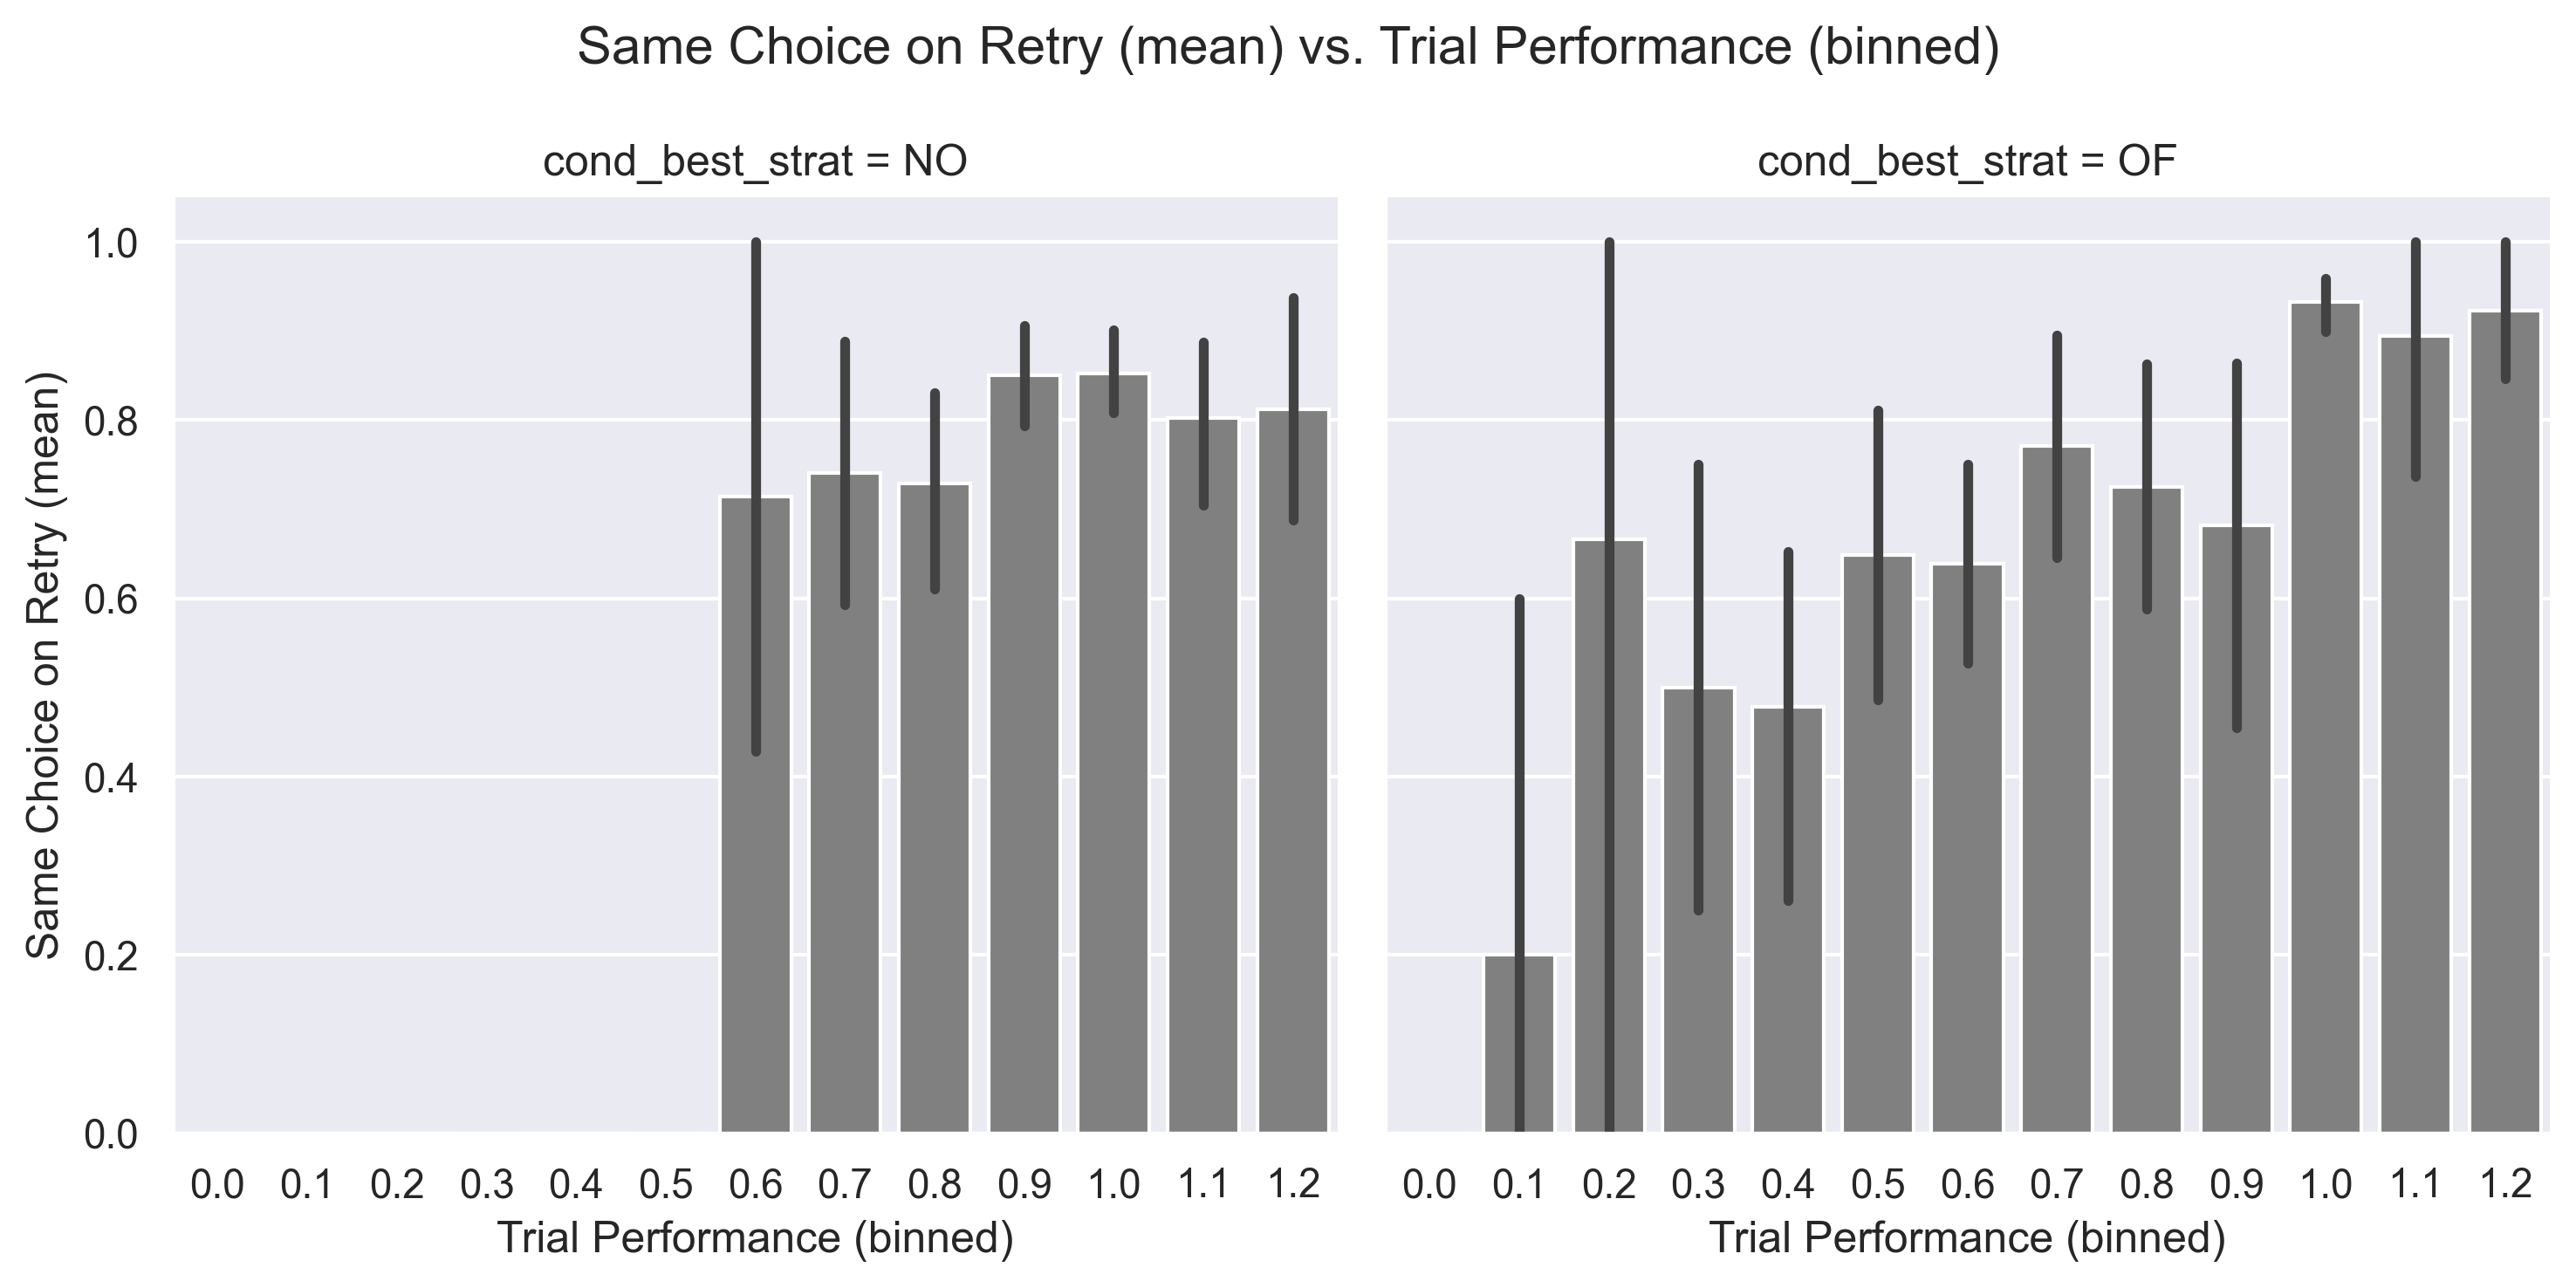

In [76]:
def binned_means(df, y='retry_response', bin_var='performance', figure_attr="map_kind", figure_vals=["random", "spatial"],
                 bins=np.arange(0, 1.3, 0.1), title=None, xlabel=None, ylabel=None):
    sns.set(rc={"figure.dpi":300})

    # fig, axs = plt.subplots(dpi=300)    
    bin_idxs = np.digitize(df[bin_var], bins)
    bin_idx_var = '%s_bin_idxs' % bin_var
    df[bin_idx_var] = bin_idxs
    
    G = sns.catplot(data=df, x=bin_idx_var, y=y, kind='bar', col=figure_attr, color='gray')
    G.set_xticklabels(["%.1f" % x for x in bins])
    G.set_xlabels(xlabel)
    G.set_ylabels(ylabel)
        
    if title is None:
        title = "%s vs. %s" % (ylabel, xlabel)
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    
binned_means(df_retry_trials,
             ylabel="Same Choice on Retry (mean)", xlabel="Trial Performance (binned)")

binned_means(df_retry_trials, figure_attr="cond_best_strat", figure_vals=["NO", "OF"],
             ylabel="Same Choice on Retry (mean)", xlabel="Trial Performance (binned)")